# Spam classification

In [1]:
# import os
import json
import numpy as np
import pandas as pd
from numpy import random

from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as progressbar

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams['figure.figsize'] = [9, 6]

## Load data

In [5]:
def load_json_from_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return json.load(f)

In [6]:
folder = "C:\\Users\\user\\ML_Basecamp\\Naive Bayes\\data\\"

In [7]:
emails_tokenized_ham = load_json_from_file(folder + "emails-tokenized-ham.json")
emails_tokenized_spam = load_json_from_file(folder + "emails-tokenized-spam.json")
#vocab = load_json_from_file("vocab.json")

In [8]:
import itertools
vocab_set = set(itertools.chain(*emails_tokenized_ham)).union(set(itertools.chain(*emails_tokenized_spam)))

In [9]:
vocab = {
    word: index
    for index, word in enumerate(sorted(list(vocab_set)))
}

In [10]:
vocab

{'aa': 0,
 'aaaaaa': 1,
 'aaaaaaaaaaaaaaaaix': 2,
 'aaaaanyway': 3,
 'aaar': 4,
 'aabbcc': 5,
 'aabc': 6,
 'aac': 7,
 'aachen': 8,
 'aacut': 9,
 'aag': 10,
 'aak': 11,
 'aalib': 12,
 'aaliyah': 13,
 'aao': 14,
 'aapl': 15,
 'aaqkh': 16,
 'aardvark': 17,
 'aardvarkzilla': 18,
 'aaron': 19,
 'aarondot': 20,
 'aaronsen': 21,
 'aarp': 22,
 'aatr': 23,
 'aavid': 24,
 'aavishkar': 25,
 'aawfcvwyfk': 26,
 'aaxin': 27,
 'ab': 28,
 'abacha': 29,
 'abandon': 30,
 'abat': 31,
 'abba': 32,
 'abbestellen': 33,
 'abbey': 34,
 'abbrevi': 35,
 'abc': 36,
 'abcadc': 37,
 'abcnew': 38,
 'abdomin': 39,
 'abduct': 40,
 'abducte': 41,
 'abdul': 42,
 'abdullah': 43,
 'abe': 44,
 'abel': 45,
 'abelard': 46,
 'abelson': 47,
 'aber': 48,
 'aberdeenshir': 49,
 'aberr': 50,
 'abet': 51,
 'abh': 52,
 'abhorr': 53,
 'abi': 54,
 'abid': 55,
 'abidjan': 56,
 'abil': 57,
 'abili': 58,
 'abilir': 59,
 'abilti': 60,
 'abiltiy': 61,
 'abit': 62,
 'abiword': 63,
 'abject': 64,
 'abk': 65,
 'abl': 66,
 'ablard': 67,
 'abl

In [11]:
len(vocab)

34133

In [12]:
sample_emails = [emails_tokenized_ham[42], emails_tokenized_spam[42]]
for email in sample_emails:
    print(email)
    print()

['accord', 'son', 'actual', 'homer', 'simpson', 'claim', 'french', 'word', 'victori', 'chuck', 'thursday', 'august', 'number', 'number', 'number', 'number', 'pm', 'robert', 'harley', 'wrote', 'appar', 'quot', 'dubya', 'time', 'sent', 'dad', 'httpaddress', 'toni', 'blair', 'special', 'relationship', 'georg', 'w', 'bush', 'consider', 'strain', 'two', 'disagre', 'yassir', 'arafat', 'tenur', 'leader', 'palestinian', 'author', 'blair', 'start', 'tell', 'disparag', 'anecdot', 'presid', 'baro', 'william', 'crosbi', 'recal', 'stori', 'told', 'good', 'friend', 'toni', 'blair', 'recent', 'brighton', 'blair', 'bush', 'jacqu', 'chirac', 'discuss', 'econom', 'particular', 'declin', 'french', 'economi', 'problem', 'french', 'bush', 'confid', 'blair', 'word', 'entrepreneur', 'r', 'httpaddress', 'httpaddress']

['miss', 'amaz', 'busi', 'opportun', 'weight', 'loss', 'product', 'pleas', 'visit', 'www', 'autodreamteam', 'com', 'oblig', 'worth', 'look']



In [13]:
#create array with quantity words from vocab for each sentence (like [0, 0, 4, 1, 1, 0])
def email_to_vector_bow(email_words, vocab):
    email_vec = np.zeros(len(vocab), dtype="int32")
    
    for word in email_words:
        if word in vocab:
            email_vec[vocab[word]] += 1 #in downloaded file was =1 but it doesn't include case when we have several  
                                       #the same words in one message
    return email_vec

In [14]:
#Create array with indexes of words in vocab
def email_to_vector_multinomial(email_words, vocab):
    return np.array([vocab[word] for word in email_words], dtype="int32")

## Using email_to_vector_multinomial

In [15]:
email2vec = email_to_vector_multinomial

In [16]:
%%time
X = [
    email2vec(email, vocab)
    for email in emails_tokenized_ham + emails_tokenized_spam
]
np.shape(X)

Wall time: 557 ms


(5542,)

In [17]:
X

[array([ 6753, 32387, 20419,  1845, 20419, 20419, 20419, 20419, 20419,
         4953, 11294,  8851, 18277, 13735,  8851, 24685,  9255, 24641,
        16819,  9451, 29715, 32789,  9774,  6918, 17096, 22279, 12572,
        20419, 20419, 20419,  9546, 22279, 14079, 16947, 16466, 16466,
        28335, 11054, 24099, 24099, 20419, 20419, 26306, 18242, 20419,
        20419, 20419,  9546, 22279, 14079, 16947, 16466, 16466, 28335,
        11054, 24099, 24099, 20419, 20419, 26306, 18242, 20419, 20419,
        20419, 20419, 13110, 20419, 20419, 20419, 17774, 20419, 13110,
        20419, 20419, 20419, 29801, 28812,  9255,  9645, 14487, 20289,
        25426, 22279,  5509, 12517,  7096, 22279, 14079, 16947, 16466,
        16466, 28335, 11054, 24099, 24099, 20419, 20419, 26306, 18242,
        20419, 13110, 20419, 13110,  5495, 20558, 31635, 20085, 31288,
         7096, 22279, 31635, 22279, 20085, 20419, 20419, 20419,  5588,
        11065,  6376, 19223, 21402,  1819, 28486, 17730, 20419, 20419,
      

In [292]:
for email in sample_emails:
    email_vec = email2vec(email, vocab)
    
    print("Email text:", email)
    print("Email vector:", email_vec)
    print("Length:", email_vec.shape)
    print()

Email text: ['accord', 'son', 'actual', 'homer', 'simpson', 'claim', 'french', 'word', 'victori', 'chuck', 'thursday', 'august', 'number', 'number', 'number', 'number', 'pm', 'robert', 'harley', 'wrote', 'appar', 'quot', 'dubya', 'time', 'sent', 'dad', 'httpaddress', 'toni', 'blair', 'special', 'relationship', 'georg', 'w', 'bush', 'consider', 'strain', 'two', 'disagre', 'yassir', 'arafat', 'tenur', 'leader', 'palestinian', 'author', 'blair', 'start', 'tell', 'disparag', 'anecdot', 'presid', 'baro', 'william', 'crosbi', 'recal', 'stori', 'told', 'good', 'friend', 'toni', 'blair', 'recent', 'brighton', 'blair', 'bush', 'jacqu', 'chirac', 'discuss', 'econom', 'particular', 'declin', 'french', 'economi', 'problem', 'french', 'bush', 'confid', 'blair', 'word', 'entrepreneur', 'r', 'httpaddress', 'httpaddress']
Email vector: [  174 27406   272 13253 26835  5105 10917 32883 31715  4979 29639  1850
 20419 20419 20419 20419 22575 25111 12614 33008  1315 23819  8262 29715
 26284  6613 13468 299

In [293]:
y = np.array([0] * len(emails_tokenized_ham) + [1] * len(emails_tokenized_spam))
len(y)

5542

### Train Model

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Підрахуємо сумарну кількість слів у ham- і spam-листах відповідно.

In [295]:
ham_total_words_train = sum(len(email) for email, cls in zip(X_train, y_train) if cls == 0)
spam_total_words_train = sum(len(email) for email, cls in zip(X_train, y_train) if cls == 1)

Тепер обчислимо апріорні ймовірності для класів ham і spam.

Щоб уникнути машинних проблем із множенням великої кількості малих дробів, ми працюватимемо з логарифмами ймовірностей.
$\log{P(ham)} = \log{\frac{\sum_{i=1}^{m}1\{y^{(i)}=ham\}}{m}}$

$\log{P(spam)} = \log{\frac{\sum_{i=1}^{m}1\{y^{(i)}=spam\}}{m}}$

In [296]:
ham_email_indices = np.where(y_train == 0)[0]
spam_email_indices = np.where(y_train == 1)[0]

In [297]:
ham_log_prior = np.log(len(ham_email_indices) / len(y_train))
spam_log_prior = np.log(len(spam_email_indices) / len(y_train))

In [298]:
print(ham_log_prior)
print(spam_log_prior)

-0.3407323507725008
-1.2421914129760763


Обчислимо правдоподібності (likelihood) для кожного слова. Також застосуємо згладжування Лапласа, щоб уникнути ділення на нуль. Вважаємо, що бачили кожне слово на один раз більше.

$\log{\phi_{word\,|\,class}} = \log{\frac{\sum_{i=1}^{m} \sum_{j=1}^{n_i} {1\{x_{j}^{(j)}=word \, \land \, y=class\}} + 1}{\sum_{i=1}^{m}{1\{y=class\}n_i} \,+\, |V|}}$

Створимо порожні вектори $\log{\phi_{word \, | \, ham}}$ та $\log{\phi_{word \, | \, spam}}$ і заповнимо їх для кожного слова зі словника.

In [299]:
ham_log_phi = np.zeros(len(vocab), dtype="float64")
spam_log_phi = np.zeros(len(vocab), dtype="float64")

In [300]:
ham_word_counts = np.zeros(len(vocab))
spam_word_counts = np.zeros(len(vocab))

In [301]:
%%time
for email_index in progressbar(range(len(X_train)), desc="Train"):
    for word_index in X_train[email_index]:
        if y_train[email_index] == 0:
            ham_word_counts[word_index] += 1
        if y_train[email_index] == 1:
            spam_word_counts[word_index] += 1

ham_log_phi = np.log((ham_word_counts + 1) / (ham_total_words_train + len(vocab)))
spam_log_phi = np.log((spam_word_counts + 1) / (spam_total_words_train + len(vocab)))


Wall time: 4.74 s


### Predict

$\log P(y=class\,|\,words) = \log \frac{P(words\,|\,y=class) P(y=class)}{P(words)} = \sum_{i=1}^{n} \log P(words_i\,|\,y=class) + \log P(y=class) - \log P(words)$


Пригадайте, що знаменник $P(words)$ — один і той самий для обох класів, тому для передбачення його можна проігнорувати.

In [302]:
def predict(X):
    y_pred = np.zeros(len(X))

    for i in progressbar(range(len(y_pred)), desc="Predict"):
        email_vector = X[i]

        ham_posterior = ham_log_phi[email_vector].sum() + ham_log_prior
        spam_posterior = spam_log_phi[email_vector].sum() + spam_log_prior
        
        # Whichever class has the bigger posterior probability, wins.
        y_pred[i] = 0 if ham_posterior > spam_posterior else 1
    
    return y_pred

In [303]:
%%time
pred_train = predict(X_train)
pred_test = predict(X_test)


Wall time: 271 ms


In [304]:
accuracy_train = 1 - np.sum(pred_train != y_train) / len(y_train)
accuracy_test = 1 - np.sum(pred_test != y_test) / len(y_test)

In [305]:
print("Training accuracy:   {0:.3f}%".format(accuracy_train * 100))
print("Test accuracy:       {0:.3f}%".format(accuracy_test * 100))

Training accuracy:   97.654%
Test accuracy:       97.477%


In [306]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
print(cm)

[[405   0]
 [ 14 136]]


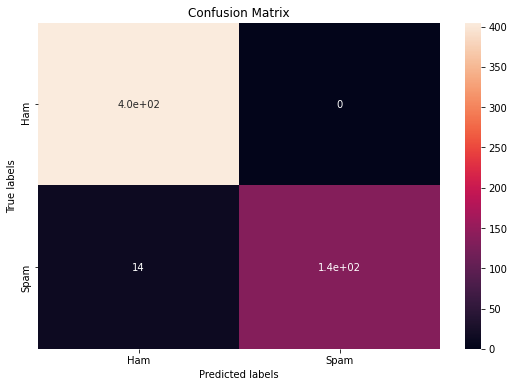

In [307]:
import seaborn as sns
labels = ['Ham','Spam']

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

In [308]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  pred_test, target_names = labels))

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       405
        Spam       1.00      0.91      0.95       150

    accuracy                           0.97       555
   macro avg       0.98      0.95      0.97       555
weighted avg       0.98      0.97      0.97       555



### Metrics

Classification accuracy, classification_report (what include f1, precision, recall), confusion_matrix are good metrics for evaluating classification learning algorithms. Also we can use roc_auc

In [309]:
from sklearn.metrics import roc_auc_score

In [310]:
print("roc_auc_score:", round(roc_auc_score(y_test, pred_test), 2))

roc_auc_score: 0.95


## Using email_to_vector_bow

In [311]:
email2vec = email_to_vector_bow

In [312]:
%%time
X = [
    email2vec(email, vocab)
    for email in emails_tokenized_ham + emails_tokenized_spam
]
np.shape(X)

Wall time: 3.39 s


(5542, 34133)

In [313]:
for email in sample_emails:
    email_vec = email2vec(email, vocab)
    
    print("Email text:", email)
    print("Email vector:", email_vec)
    print("Length:", email_vec.shape)
    print()

Email text: ['accord', 'son', 'actual', 'homer', 'simpson', 'claim', 'french', 'word', 'victori', 'chuck', 'thursday', 'august', 'number', 'number', 'number', 'number', 'pm', 'robert', 'harley', 'wrote', 'appar', 'quot', 'dubya', 'time', 'sent', 'dad', 'httpaddress', 'toni', 'blair', 'special', 'relationship', 'georg', 'w', 'bush', 'consider', 'strain', 'two', 'disagre', 'yassir', 'arafat', 'tenur', 'leader', 'palestinian', 'author', 'blair', 'start', 'tell', 'disparag', 'anecdot', 'presid', 'baro', 'william', 'crosbi', 'recal', 'stori', 'told', 'good', 'friend', 'toni', 'blair', 'recent', 'brighton', 'blair', 'bush', 'jacqu', 'chirac', 'discuss', 'econom', 'particular', 'declin', 'french', 'economi', 'problem', 'french', 'bush', 'confid', 'blair', 'word', 'entrepreneur', 'r', 'httpaddress', 'httpaddress']
Email vector: [0 0 0 ... 0 0 0]
Length: (34133,)

Email text: ['miss', 'amaz', 'busi', 'opportun', 'weight', 'loss', 'product', 'pleas', 'visit', 'www', 'autodreamteam', 'com', 'obli

In [314]:
y = np.array([0] * len(emails_tokenized_ham) + [1] * len(emails_tokenized_spam))
len(y)

5542

### Train model

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [316]:
#totas quantity of ham words and spam words in train data

ham_total_words_train = np.sum(sum(email for email, cls in zip(X_train, y_train) if cls == 0))
spam_total_words_train = np.sum(sum(email for email, cls in zip(X_train, y_train) if cls == 1))

In [332]:
spam_total_words_train

573036

In [317]:
ham_log_phi = np.zeros(len(vocab), dtype="float64")
spam_log_phi = np.zeros(len(vocab), dtype="float64")

In [318]:
ham_word_counts = np.zeros(len(vocab))
spam_word_counts = np.zeros(len(vocab))

In [319]:
#first if is equal to sum(email for email, cls in zip(X_train, y_train) if cls == 0)
#second if is equal to sum(email for email, cls in zip(X_train, y_train) if cls == 1)

%%time
for email_index in progressbar(range(len(X_train)), desc="Train"):
    if y_train[email_index] == 0:                   #every X[i] consist of quantity of all words from voc         
        ham_word_counts += X_train[email_index]     #and if we sum all X[i] where y[i] == 0, we will have array 
    if y_train[email_index] == 1:                   #what consist of quantity of all words in ham dataset from voc
        spam_word_counts += X_train[email_index]    #same situation for spam data

ham_log_phi = np.log((ham_word_counts + 1) / (ham_total_words_train + len(vocab)))
spam_log_phi = np.log((spam_word_counts + 1) / (spam_total_words_train + len(vocab)))


Wall time: 527 ms


### Predict

In [320]:
def predict(X):
    print('len(X)', len(X))
    y_pred = np.zeros(len(X))
    
    print('len(y_pred)', len(y_pred))
    for i in progressbar(range(len(y_pred)), desc="Predict"):
        email_vector = X[i]

        ham_posterior = np.sum(email_vector * ham_log_phi) + ham_log_prior     #email vector consist of quantity of words 
        spam_posterior = np.sum(email_vector * spam_log_phi) + spam_log_prior  #from X[i] and ham_log_phi consist of phi for 
                                                                               #every word from dataset
        # Whichever class has the bigger posterior probability, wins.          #We have situation like 
        y_pred[i] = 0 if ham_posterior > spam_posterior else 1                 #sum([0, 1, 2, 0] * [1, 1, 1, 1]) = 3
    
    return y_pred

In [321]:
%%time
pred_train = predict(X_train)
pred_test = predict(X_test)

len(X) 4987
len(y_pred) 4987



len(X) 555
len(y_pred) 555



Wall time: 2.01 s


In [322]:
accuracy_train = 1 - np.sum(pred_train != y_train) / len(y_train)
accuracy_test = 1 - np.sum(pred_test != y_test) / len(y_test)

In [327]:
print("Training accuracy:   {0:.3f}%".format(accuracy_train * 100))
print("Test accuracy:       {0:.3f}%".format(accuracy_test * 100))
print("Roc_auc_score:       {0:.3f}%".format(roc_auc_score(y_test, pred_test)*100))

Training accuracy:   97.654%
Test accuracy:       97.477%
Roc_auc_score:       95.333%


In [324]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
print(cm)

[[405   0]
 [ 14 136]]


In [328]:
print(classification_report(y_test,  pred_test, target_names = labels))

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       405
        Spam       1.00      0.91      0.95       150

    accuracy                           0.97       555
   macro avg       0.98      0.95      0.97       555
weighted avg       0.98      0.97      0.97       555



## Difference beetween email_to_vector_multinomial and email_to_vector_bow

In [329]:
conclusions = pd.DataFrame({"email_to_vector_multinomial": ['97.654 %', '97.477 %', '97%', '95.333%',
                                                            '527 ms', '4.74 s', '271 ms'],
                           "email_to_vector_bow": ['97.654 %', '97.477 %', '97%', '95.333%',
                                                   '3.39 s', '527 ms', '2.01 s']},
                           index=['Training accuracy', 'Test accuracy', "f1", "roc-auc", 'Time for preparing data',
                                  'Time for finding ham and spam log_phi', 'Time for predictions'])

In [330]:
conclusions

,email_to_vector_multinomial,email_to_vector_bow
Training accuracy,97.654 %,97.654 %
Test accuracy,97.477 %,97.477 %
f1,97%,97%
roc-auc,95.333%,95.333%
Time for preparing data,527 ms,3.39 s
Time for finding ham and spam log_phi,4.74 s,527 ms
Time for predictions,271 ms,2.01 s


Training and test accuracy are the same\
The whole time what email_to_vector_multinomial spends is less than the whole time what spends email_to_vector_bow\
Email_to_vector_multinomial is faster for preparing data and prediction

## Naive Bayes classifiers from Sklearn 

In [222]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [226]:
#use crossvalidation for tuning parameter alpha

results = {}
row_results = {}

list_of_alpha =  [0.001, 0.005, 0.01, 0.05, 0.1]

for i,alpha in enumerate(list_of_alpha):
  clf = MultinomialNB(alpha=alpha) # create instance of model

  # make pipeline as list of pairs (<stage name>, <stage object>):
  pipeline = Pipeline([("clf", clf)]) 
  
  # from now we can treat pipeline as a single model, applying all stages when using fit() and predict() 
  pipeline.fit(X_train, y_train)

  # Evaluate pipeline using crossvalidation and score() method
  scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

  # Save results
  results[alpha] = {'CV_mean': 1 - scores.mean(), 'CV_std':scores.std()} #, 'Test':test_scores
  row_results[alpha] = scores

In [230]:
results = pd.DataFrame(results).T
results.style.highlight_min()

,CV_mean,CV_std
0.001,0.0286758,0.00594223
0.005,0.028074,0.00435466
0.01,0.0284752,0.00433709
0.05,0.0294784,0.00506768
0.1,0.0298792,0.00468732


In [231]:
model = MultinomialNB(alpha=0.005)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [232]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       415
           1       0.93      1.00      0.97       140

    accuracy                           0.98       555
   macro avg       0.97      0.99      0.98       555
weighted avg       0.98      0.98      0.98       555

